# Trabalho Prático - Parte I

**Disciplina:** Redes Neurais Artificiais

**Problema:** Previsão do custo de seguro saúde com base em dados pessoais.

**Biblioteca:** scikit-learn

**Modelo:** MLPRegressor

---

## 1. Escolha do Conjunto de Dados

Utilizamos o dataset **Insurance** disponível em [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance).

- **Tarefa:** Regressão
- **Variável alvo:** `charges` (valor do seguro)
- **Número de amostras:** 1338
- **Número de atributos:** 6 (3 numéricos e 3 categóricos)

A variável resposta `charges` apresenta uma distribuição assimétrica à direita, com alguns valores muito altos.

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

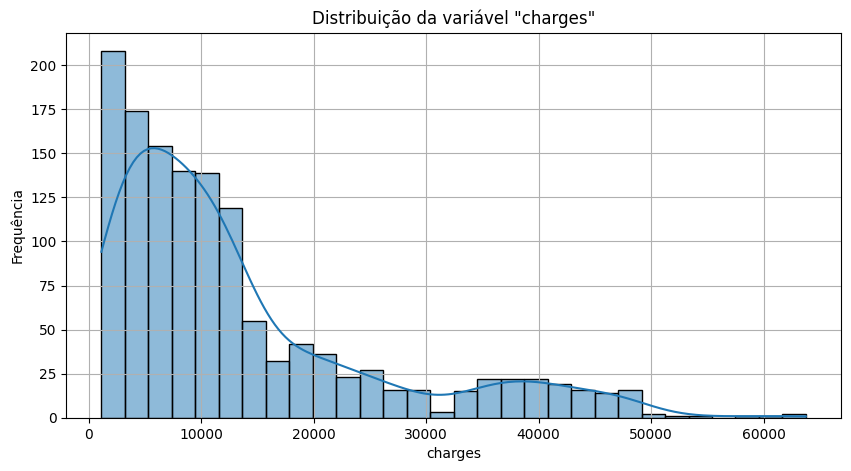

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

# Visualizar estrutura dos dados
print(df.head())
print(df.info())
print(df.describe())

# Histograma da variável resposta
plt.figure(figsize=(10, 5))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribuição da variável "charges"')
plt.xlabel('charges')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## 2. Pré-processamento

As variáveis categóricas foram codificadas (OneHotEncoder para `region`, e codificação binária para `sex` e `smoker`). As variáveis numéricas foram padronizadas com StandardScaler.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar X e y
X = df.drop('charges', axis=1)
y = df['charges']

# Identificar tipos de colunas
num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

# Criar transformadores
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')

# Pré-processador
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

# Separar treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Construção do Modelo com MLPRegressor

Utilizamos uma rede MLP simples com os hiperparâmetros padrão e `max_iter=1000`. Avaliamos o modelo com MSE, MAE e R².

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Criar pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(max_iter=1000, random_state=42))
])

# Treinar modelo
model.fit(X_train, y_train)

# Previsão e avaliação
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

MSE: 122762462.83
MAE: 7418.87
R²: 0.21


C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4. Visualização: Valor Real vs Valor Predito

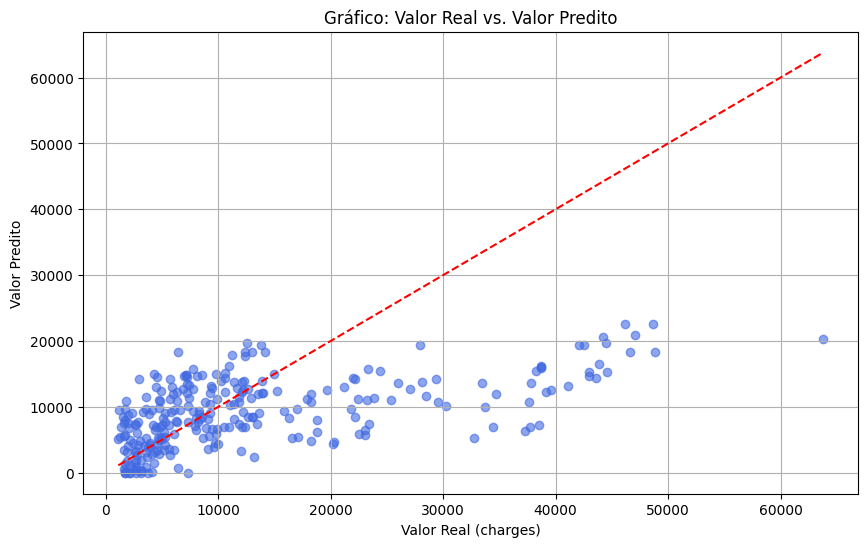

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor Real (charges)')
plt.ylabel('Valor Predito')
plt.title('Gráfico: Valor Real vs. Valor Predito')
plt.grid(True)
plt.show()

## 5. Conclusão

O modelo MLP apresentou desempenho inicial modesto, com R² de aproximadamente 0.21 e erro médio absoluto (MAE) em torno de 7.418,87. O gráfico mostra que o modelo tende a subestimar os valores mais altos de seguro, especialmente para indivíduos com características mais extremas (como fumantes com idade ou IMC elevados). Na Parte II, serão aplicadas técnicas para melhorar o desempenho do modelo, como regularização, validação e ajuste de hiperparâmetros.